In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import seaborn as sns
from seaborn import plt

In [3]:
df = pd.DataFrame.from_csv('2013_movies.csv')

In [44]:
df.head(1)

,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
Title,,,,,,
The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00


In [49]:
df_1 = df[['DomesticTotalGross','ReleaseDate']]

#df_1['ReleaseDate'] = int(df['ReleaseDate'].split('/')[1])
#df_1.sort_values('ReleaseDate')
#df_1 = df_1.set_index('ReleaseDate')


df_1.head(5)

,DomesticTotalGross,ReleaseDate
Title,,
The Hunger Games: Catching Fire,424668047,11/22/13 0:00
Iron Man 3,409013994,5/3/13 0:00
Frozen,400738009,11/22/13 0:00
Despicable Me 2,368061265,7/3/13 0:00
Man of Steel,291045518,6/14/13 0:00


In [59]:
def clean_months(value):
    
    data = {}
    release_month = value.split('/')[0]
    data['ReleaseMonth'] = (release_month)

df_1['ReleaseMonth'] = df_1['ReleaseDate'].apply(clean_months)

/Users/zach/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


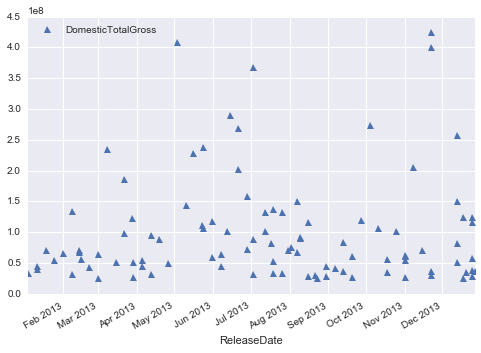

In [83]:
#2.1 - Plot Domestic Gross over time

df["ReleaseDate"] = pd.to_datetime(df["ReleaseDate"])
df.plot(x='ReleaseDate', y='DomesticTotalGross', style='^')

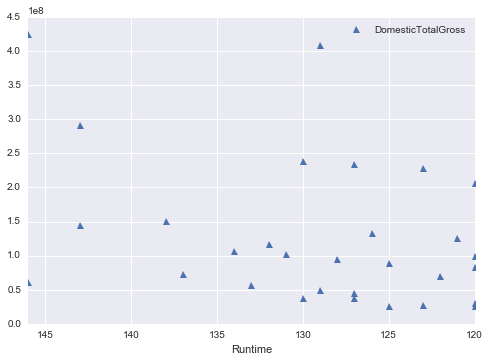

In [84]:
#2.2 - DomesticTotalGross x Runtime
df.plot(x='Runtime', y='DomesticTotalGross', style='^')

In [67]:
#2.3 - Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.
rating_df = df.groupby('Rating').mean().reset_index
rating_df

<bound method DataFrame.reset_index of               Budget  DomesticTotalGross     Runtime
Rating                                              
G                NaN        2.684928e+08  107.000000
PG      9.393333e+07        1.311357e+08   99.933333
PG-13   9.660976e+07        1.114498e+08  117.510638
R       3.886364e+07        6.989243e+07  110.729730>

In [74]:
df.head(1)

,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
Title,,,,,,
The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00


/Users/zach/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735040.0, right=735040.0
  'left=%s, right=%s') % (left, right))


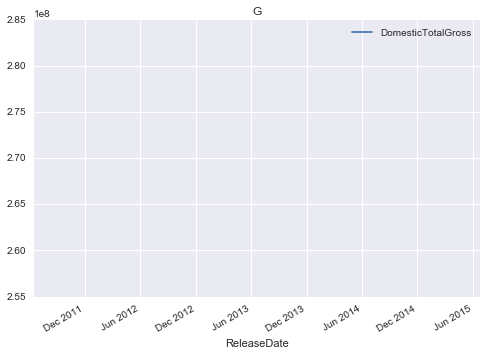

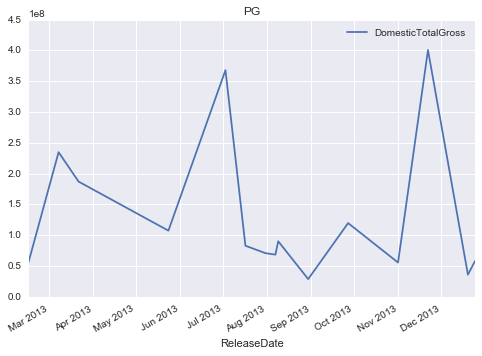

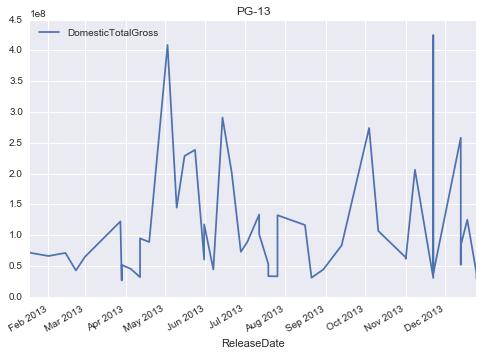

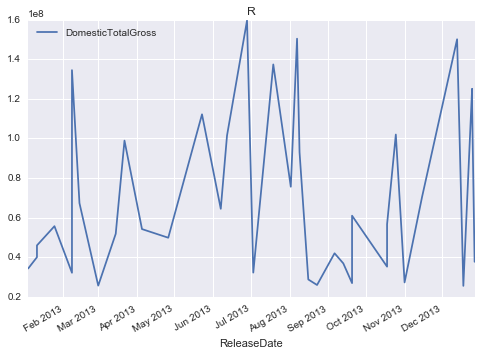

In [85]:
#2.4 - Make one figure with (N=#Ratings) subplots, and in each plot the release date vs the domestic total gross.
for i, group in df.groupby(['Rating']):
    plt.figure()
    group.plot(x='ReleaseDate', y='DomesticTotalGross', title=str(i))

In [71]:
#2.5 - Francis Lawrence has the highest mean Domestic Total Gross of all directors
rating_df = df.groupby('Director').mean().sort_values('DomesticTotalGross', ascending = False).reset_index
rating_df

<bound method DataFrame.reset_index of                                  Budget  DomesticTotalGross  Runtime
Director                                                            
Francis Lawrence            130000000.0         424668047.0    146.0
Shane Black                 200000000.0         409013994.0    129.0
Chris BuckJennifer Lee      150000000.0         400738009.0    108.0
Pierre CoffinChris Renaud    76000000.0         368061265.0     98.0
Zack Snyder                 225000000.0         291045518.0    143.0
Alfonso Cuaron              100000000.0         274092705.0     91.0
Dan Scanlon                         NaN         268492764.0    107.0
Peter Jackson                       NaN         258366855.0    161.0
Justin Lin                  160000000.0         238679850.0    130.0
Sam Raimi                   215000000.0         234911825.0    127.0
J.J. Abrams                 190000000.0         228778661.0    123.0
Alan Taylor                 170000000.0         206362140.0    1

In [ ]:
#2.6 